# A/B Testing: Comparing Webpage Conversion Rates 

## Objective  

We want to determine whether a new webpage design (Variant B) leads to a **higher conversion rate** than the current design (Variant A).  
Because we don’t have real traffic data, we **simulate** visitor behaviour and then apply statistical tests to see if any observed difference is significant.

### Key Terms  
- **Conversion Rate (CR)** – fraction of visitors who complete the desired action (purchase, signup, etc.).  
- **A/B Test** – experiment showing two variants to independent groups to compare performance.  
- **Hypothesis Test** – formal method to decide whether an observed difference is due to chance.


## Step 1: Import Libraries & Simulate Data

We begin by importing essential Python libraries like `numpy`, `pandas`, `scipy`, and `statsmodels` for statistical calculations.  

Then, we simulate visitor behavior using the binomial distribution for two webpage variants:  
- **Variant A** (current version) with a true conversion rate of 10%  
- **Variant B** (new version) with a slightly improved rate of 12%

We assume 10,000 users visited each version. The number of users who convert (successes) is simulated based on these probabilities.

In [1]:
# numpy & pandas for data manipulation
# matplotlib for plotting results
# statsmodels & scipy for statistical tests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

## Step 2: Simulate Visitor Data  

We assume 10 000 visitors see each variant.  
- **Variant A** baseline CR = 10 %  
- **Variant B** expected CR = 12 %  

Using a **binomial distribution**, we simulate how many visitors convert (successes) under each variant.


In [2]:
# >>> Simulate conversions for each variant
n_A, p_A = 10_000, 0.10   # visitors & true conversion prob for A
n_B, p_B = 10_000, 0.12   # visitors & true conversion prob for B

# Binomial draw: how many successes (conversions) occur?
success_A = np.random.binomial(n_A, p_A)
success_B = np.random.binomial(n_B, p_B)

print(f"Variant A conversions: {success_A}")
print(f"Variant B conversions: {success_B}")


Variant A conversions: 949
Variant B conversions: 1243


## Step 3: Calculate Conversion Rates and Confidence Intervals

Here, we define a custom function `proportion_ci()` that calculates the **conversion rate** and its **95% confidence interval** for each variant.

A confidence interval helps us understand the range in which the actual conversion rate likely falls. We then use this function to compute the conversion rate and CI for both Variant A and Variant B.

Finally, the results are stored in a DataFrame for easier viewing and comparison.



In [3]:
# >>> Helper: compute 95 % CI for a proportion
def proportion_ci(k: int, n: int, alpha: float = 0.05):
    p_hat = k / n
    z = norm.ppf(1 - alpha / 2)
    se = np.sqrt(p_hat * (1 - p_hat) / n)   # standard error
    half_width = z * se
    return p_hat, p_hat - half_width, p_hat + half_width

# Calculate CR & CI for each variant
cr_A, ci_low_A, ci_high_A = proportion_ci(success_A, n_A)
cr_B, ci_low_B, ci_high_B = proportion_ci(success_B, n_B)

results = pd.DataFrame({
    'Variant': ['A', 'B'],
    'Visitors': [n_A, n_B],
    'Conversions': [success_A, success_B],
    'CR (%)': [cr_A*100, cr_B*100],
    'CI Lower (95%)': [ci_low_A*100, ci_low_B*100],
    'CI Upper (95%)': [ci_high_A*100, ci_high_B*100]
})
results

,Variant,Visitors,Conversions,CR (%),CI Lower (95%),CI Upper (95%)
0,A,10000,949,9.49,8.915580,10.064420
1,B,10000,1243,12.43,11.783362,13.076638


## Step 3: Visualizing Conversion Rates with Confidence Intervals

To compare the performance of both variants visually, we plot their conversion rates using a bar chart with **error bars** that show the 95% confidence intervals.

This helps us quickly understand whether the difference between the two rates might be statistically significant.


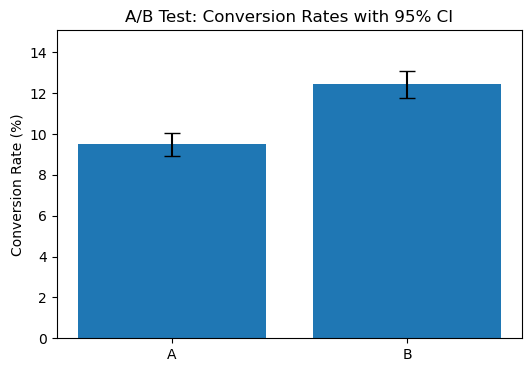

In [4]:
# >>> Plot CR with error bars
plt.figure(figsize=(6,4))
plt.bar(['A','B'], results['CR (%)'], yerr=[results['CR (%)']-results['CI Lower (95%)'],
                                           results['CI Upper (95%)']-results['CR (%)']],
        capsize=6)
plt.ylabel('Conversion Rate (%)')
plt.title('A/B Test: Conversion Rates with 95% CI')
plt.ylim(0, results['CI Upper (95%)'].max() + 2)
plt.show()


## Step 4: Hypothesis Testing Using Z-Test

Now we perform a **two-proportion z-test** to statistically compare the conversion rates of both variants.

### Hypotheses:
- **Null Hypothesis (H₀)**: Variant B is not better than A (p_B ≤ p_A)
- **Alternative Hypothesis (H₁)**: Variant B is better than A (p_B > p_A)

We calculate the z-statistic and corresponding p-value.  
If the p-value is less than 0.05, we reject the null hypothesis, meaning **Variant B is significantly better** than Variant A.


In [5]:
# >>> Perform two‑sample proportions z‑test
count = np.array([success_A, success_B])
nobs  = np.array([n_A, n_B])

stat, pval = proportions_ztest(count, nobs, alternative='larger')  # 'larger' tests B > A
print(f"Z‑statistic = {stat:.3f}, p‑value = {pval:.4f}")

Z‑statistic = -6.655, p‑value = 1.0000


## Final Summary & Conclusion

- We simulated user behavior for two webpage designs using binomial distribution.
- Conversion rates for each variant were calculated along with 95% confidence intervals.
- A z-test was used to statistically compare the two variants.

### 💡 Key Result:
- If the p-value < 0.05, we conclude **Variant B performs significantly better than Variant A.**

This project helped me understand how statistical techniques like A/B testing can be applied in real-world product or marketing experiments to make data-driven decisions.
